# Figure Generation Process

## Pairwise generation

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import os
import pickle


Bad key "text.kerning_factor" on line 4 in
/Users/Nathan/anaconda3/envs/slam/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [10]:
def plot_from_different_experiments(list_dict_result, x_param="noise", static_param_value=0, name_dataset="full", name_metric="Recall"):
    """ Get the result of different experiments and combine
        them to create a plot for one parameter throughout the experiments
    """
    
    # GO TO THE END OF THE FUNCTION FOR THE FIGURE PARAMETER
    
    if x_param == "noise":
        static_param = "outliers"
    else:
        static_param = "noise"
    
    name_algorithms = ["kergm","ipf","rrwm","smac"]
    label_corres = {"kergm":"KerGM", "ipf":"IPF", "rrwm":"RRWM", "smac":"SMAC"}
    
    # create three lists x, y and err for one plot
    x_final = []
    y_final = {alg_name:{} for alg_name in name_algorithms}
    err_final = {alg_name:{} for alg_name in name_algorithms}
    
    #y_tuple = {alg_name:{} for alg_name in name_algorithms}
    #err_tuple = {alg_name:{} for alg_name in name_algorithms}
    
    
    # We go through all the dict_results and we keep the tuple (x,val)
    for dict_result in list_dict_result:
        
        # We load the data
        dict_parameters_correspondence = dict_result["parameter_correspondence"]
        kergm_res = dict_result["kergm"]
        ipf_res = dict_result["ipf"]
        rrwm_res = dict_result["rrwm"]
        smac_res = dict_result["smac"]
        
        algos_res = [(name, dict_result[name]) for name in name_algorithms]

        # We get the integer value for the static param
        static_param_integer = dict_parameters_correspondence[static_param].index(static_param_value)
        
        # We fill the result dictionaries
        for variable_param_i, variable_param_val in enumerate(dict_parameters_correspondence[x_param]):
            
            for name_alg, dict_res_alg in algos_res:
                
                # We create the entry for the given x if it does not exist :
                if variable_param_val not in y_final[name_alg]:
                    y_final[name_alg][variable_param_val] = []
                    
                if variable_param_val not in err_final[name_alg]:
                    err_final[name_alg][variable_param_val] = []
                    
                # We compute the result
                if x_param == "noise":
                    #print(variable_param_i, static_param_integer, dict_res_alg[variable_param_i,static_param_integer,:])
                    #print(variable_param_i, static_param_integer, dict_res_alg)
                    #y_tmp = np.mean(dict_res_alg[static_param_integer,variable_param_i,:],1)
                    #err_tmp = np.std(dict_res_alg[static_param_integer,variable_param_i,:],1)
                    y_tmp = np.mean(dict_res_alg[variable_param_i,static_param_integer,:])
                    err_tmp = np.std(dict_res_alg[variable_param_i,static_param_integer,:])
                else:
                    y_tmp = np.mean(dict_res_alg[static_param_integer,variable_param_i,:])
                    err_tmp = np.std(dict_res_alg[static_param_integer,variable_param_i,:])
                    
                y_final[name_alg][variable_param_val].append(y_tmp)
                err_final[name_alg][variable_param_val].append(err_tmp)
                
    # Now that we have the numbers we take the mean of the points where there are several values
    for alg_name in y_final:
        for x_val in y_final[alg_name]:
            y_final[alg_name][x_val] = np.mean(y_final[alg_name][x_val])
            err_final[alg_name][x_val] = np.mean(err_final[alg_name][x_val])
            
            
    # We plot everything of interest   
    plt.figure(figsize=(10,6))
    
    for alg_name in y_final:
        x_list = []
        y_list = []
        err_list = []
        
        for x_val in y_final[alg_name]:
            x_list.append(x_val)
            y_list.append(y_final[alg_name][x_val])
            err_list.append(err_final[alg_name][x_val])
            
        y_list = np.array(y_list)
        err_list = np.array(err_list)
        plt.plot(x_list, y_list, label=label_corres[alg_name])
        plt.fill_between(x_list, y_list-err_list, y_list+err_list, alpha=0.2)
    
    
    ########### PARAMETERS OF THE FIGURE ##########
    if x_param == "noise":
        percent_outliers = int(static_param_value/(90 + static_param_value) * 100)
        plt.xlabel("Noise variance")
        #plt.title("Accuracy vs Noise Variance (with {:0d}% outliers)".format(percent_outliers))
        name_to_save = "plots/"+name_metric+"_vs_noise_"+name_dataset+"_"+str(static_param_value)+".png"

    else:
        x_list = [int(x/(90 + x) * 100) for x in x_list]
        plt.xlabel("% of outliers")
        #plt.title("Accuracy vs Outliers (with noise variance = "+str(static_param_value)+")")
        name_to_save = "plots/"+name_metric+"_vs_outliers_"+name_dataset+"_"+str(static_param_value)+".png"
    
    plt.ylabel(name_metric)
    plt.ylim(-0.1,1.1)
    plt.legend()
    # If we want to save the figure
    #plt.savefig(name_to_save)
    plt.show()

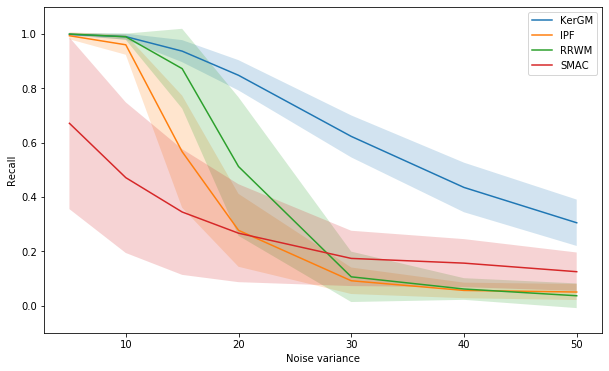

In [11]:
# Path to the pairwise result folder
path_pairwise_result = "generation_graphes/generation_pairwise/results/"

# Choose if we want recall or precision metric (Recall or Precision)
metric = "Recall"

if metric == "Recall":
    pickle_in = open(os.path.join(path_pairwise_result,"big_2_recall.pickle"),"rb")
    dict_result_2 = pickle.load(pickle_in)

    pickle_in = open(os.path.join(path_pairwise_result,"big_3_recall.pickle"),"rb")
    dict_result_3 = pickle.load(pickle_in)

elif metric ==  "Precision":
    pickle_in = open(os.path.join(path_pairwise_result,"big_2_prec.pickle"),"rb")
    dict_result_2 = pickle.load(pickle_in)

    pickle_in = open(os.path.join(path_pairwise_result,"big_3_prec.pickle"),"rb")
    dict_result_3 = pickle.load(pickle_in)
    
dict_list = [dict_result_2, dict_result_3]

plot_from_different_experiments(dict_list,"noise",20,name_metric=metric)

## Multi-graph matching figure generation

In [15]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import os
import pickle

In [24]:
def plot_one_curve(dict_results, name_in_dict, label, x, variable_to_show="accuracy", outliers_constant_integer = None, noise_constant_integer=None, color=None):
    """
    Plot the mean and std of the result of one algorithm
    given some constraints on the parameters
    """
    
    if variable_to_show == "accuracy":
        place_tuple = 0
    elif variable_to_show == "time":
        place_tuple = 1
    
    alg_res = dict_results[name_in_dict][place_tuple]
    if outliers_constant_integer != None:
        y = np.mean(alg_res[:,outliers_constant_integer,:],1)
        std = np.std(alg_res[:,outliers_constant_integer,:],1)
    elif noise_constant_integer != None:
        y = np.mean(alg_res[noise_constant_integer,:,:],1)
        std = np.std(alg_res[noise_constant_integer,:,:],1)
        
    if color == None:
        plt.plot(x, y, label=label, alpha=1)
        plt.fill_between(x, y-std, y+std, alpha=0.2)
    else:
        plt.plot(x, y, label=label, alpha=1, color=color)
        plt.fill_between(x, y-std, y+std, alpha=0.2, color=color)
    

================ NOISE ===============
FIGURE FOR  0.0 OUTLIERS


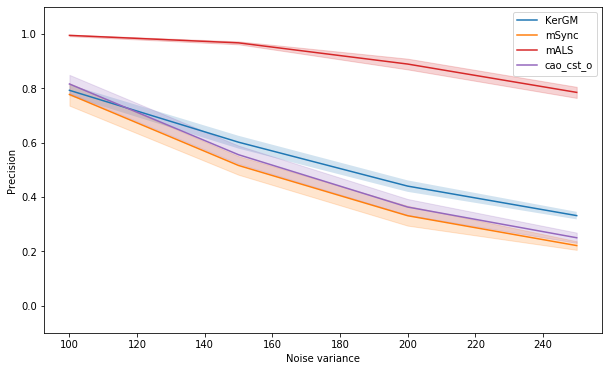

FIGURE FOR  25.0 OUTLIERS


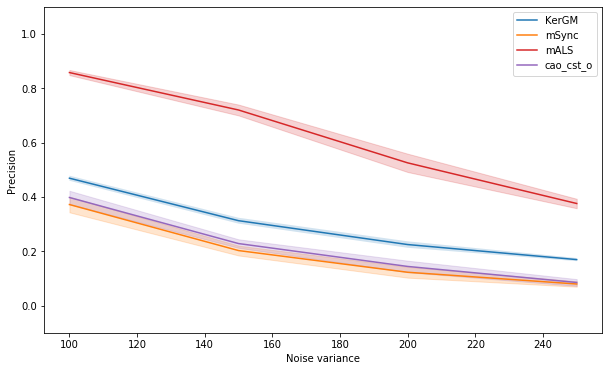

In [26]:
#Name of the dataset that will be saved in the figure name (not really important)
name_dataset = "big_high_noise_prec"
# Characteristics of the graphs, normally, this should be the right values
nb_vertices = 85
nb_graphs = 25
method = "KerGM"

# Path to the result folder of multi-graph matching
path_multi_results = "generation_graphes/generation_multi/results/"

# Metric to use ("Precision" or "Recall")
metric = "Precision"



if metric == "Precision":
    path_to_data = os.path.join(path_multi_results, "big_high_noise_prec.pickle") 
    data_to_show = "prec"
elif metric == "Recall":
    path_to_data = os.path.join(path_multi_results, "big_high_noise_recall.pickle") 
    data_to_show = "recall"


if data_to_show == "accuracy":
    name_dataset = "accuracy_"+name_dataset
elif data_to_show =="time":
    name_dataset = "time_"+name_dataset
elif data_to_show =="recall":
    name_dataset = "recall_"+name_dataset
elif data_to_show =="prec":
    name_dataset = "prec_"+name_dataset

pickle_in = open(path_to_data,"rb")
dict_results = pickle.load(pickle_in)

# Affect all the necesary variables
dict_parameters_correspondence = dict_results["parameter_correspondence"]

print("======================================")
print("================ NOISE ===============")
print("======================================")


for i in range(len(dict_parameters_correspondence["outliers"])):
    
    outliers_constant_integer = i
    nb_outliers = dict_parameters_correspondence["outliers"][i]
    print("FIGURE FOR ",nb_outliers, "OUTLIERS")
    percent_outliers = int(nb_outliers / (nb_vertices + nb_outliers) * 100)
    
    x = dict_parameters_correspondence["noise"]
    
    plt.figure(figsize=(10,6))
    if method == "KerGM":
        plot_one_curve(dict_results, "KerGM", "KerGM", x, outliers_constant_integer = outliers_constant_integer)#, variable_to_show=data_to_show)
    elif method == "good_guess":
        plot_one_curve(dict_results, "good_guess", "Good Guess", x, outliers_constant_integer = outliers_constant_integer)#, variable_to_show=data_to_show)
    
    plot_one_curve(dict_results, 
                   "mSync", 
                   "mSync", 
                   x, 
                   outliers_constant_integer = outliers_constant_integer, 
                   #variable_to_show=data_to_show,
                   color="tab:orange"
                  )

    plot_one_curve(dict_results, 
                   "mALS", 
                   "mALS", 
                   x, 
                   outliers_constant_integer = outliers_constant_integer, 
                   #variable_to_show=data_to_show,
                   color = "tab:red"
                  )

    plot_one_curve(dict_results, 
                   "cao_cst_o", 
                   "cao_cst_o", 
                   x, 
                   outliers_constant_integer = outliers_constant_integer, 
                   #variable_to_show=data_to_show,
                   color="tab:purple"
                  )
    #plot_one_curve(dict_results, "cao_cst_s_o", "cao_cst_s_o", x, outliers_constant_integer = outliers_constant_integer, variable_to_show=data_to_show)
    
    
    plt.xlabel("Noise variance")
    if data_to_show == "accuracy":
        plt.ylabel("Accuracy")
        plt.ylim(-0.1,1.1)
    elif data_to_show == "recall":
        plt.ylabel("Recall")
        plt.ylim(-0.1,1.1)
    elif data_to_show == "prec":
        plt.ylabel("Precision")
        plt.ylim(-0.1,1.1)
    elif data_to_show == "time":
        plt.ylabel("Time (in seconds)")
        #plt.ylim(-0.2,1.1)
    #plt.title("Accuracy vs Noise Variance (with {:0d}% outliers, {:0d} graphs, pairwise method {})".format(percent_outliers, nb_graphs, method))
    plt.legend()
    # If we want to save the figure
    #plt.savefig("plots/"+data_to_show+"_vs_noise_"+str(name_dataset)+"_"+str(int(dict_parameters_correspondence["outliers"][outliers_constant_integer]))+","+str(nb_graphs)+","+method+".png")
    plt.plot()
    plt.show()